In [3]:
from os import makedirs
from os.path import basename, dirname, exists, join, realpath
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import matplotlib
import sys

/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


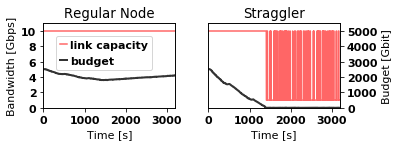

In [4]:

filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/fig18/'))

def load_data(filename):
	df = pd.read_csv(filename, sep = ",", names=["data_transferred", "budget", "crnt_bw"])
	df = df.replace(10500, 10000)
	df = df.replace(1400, 1000)
	return df

def draw_graph(filename, ax, title, show_legend, show_left_cap, show_right_cap, show_bottom_cap):
	data = load_data(filename)
	limit = 3200
	data_transferred = data["data_transferred"][:limit]
	budget = (data["budget"][:limit])
	crnt_bw = data["crnt_bw"][:limit] / 1000
	ax2 = ax.twinx()
	l2 = ax.plot(np.arange(0, len(crnt_bw)), crnt_bw, color="red", label="link capacity", alpha=0.6, lw=1.5)
	l3 = ax2.plot(np.arange(0, len(budget)), budget, color="black", label="budget", alpha=0.8, lw=2)
	
	if show_legend == True:
		lns = l2+l3
		labs = [l.get_label() for l in lns]
		ax.legend(lns, labs, loc="center left", bbox_to_anchor=(0.05, 0.65), ncol=1, handlelength=0.6, handletextpad=0.3)

	if show_left_cap == True:
		ax.set_ylabel("Bandwidth [Gbps]")
		ax.set_yticks(np.arange(0, 11, 2))
	else:
		ax.set_yticks([])
		
	if show_bottom_cap == True:
		ax.set_xlabel("Time [s]")
		ax.set_xticks(np.arange(0, limit, 1000))
	else:
		ax.set_xticks([])
		
	ax.set_ylim (0, 11)

	if show_right_cap == True:
		ax2.set_ylabel("Budget [Gbit]")
		ax2.set_yticks(np.arange(0, 5500, 1000))
	else:
		ax2.set_yticks([])
			
	ax.set_xlim(0, limit)		
	ax2.set_ylim(0, 5500)
	ax.set_title(title)

regular_node = glob.glob(join(inputdir, "node033-2019-03-09-2219*"))
straggler = glob.glob(join(inputdir, "node030-2019-03-09-2219*"))

filenames = [regular_node, straggler]

#print(filenames)

font = {'size': 11}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 2.5))

draw_graph(regular_node[0], ax[0], "Regular Node", True, True, False, True)
draw_graph(straggler[0], ax[1], "Straggler", False, False, True, True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.tight_layout()

plt.show()